In [1]:
# Import our dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import tensorflow as tf
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
# Import PLACES data
places_df = pd.read_csv("./Resources/processed_PLACES_COPD.csv")
# places_df = places_df.drop(["State_County"], axis=1)
places_df.head()

,State_County,State,County,Levels_Smokers,Levels_COPD
0,"Cass, Iowa",Iowa,Cass,19.3,8.3
1,"Monona, Iowa",Iowa,Monona,18.5,8.3
2,"Dillingham, Alaska",Alaska,Dillingham,31.1,8.9
3,"Custer, Colorado",Colorado,Custer,13.8,7.5
4,"Ketchikan Gateway, Alaska",Alaska,Ketchikan Gateway,19.4,6.6


In [3]:
# Import Coal Mines data
coal_df = pd.read_csv("./Resources/processed_Coal_Mines.csv")
# coal_df = coal_df.drop(["State_County"], axis=1)
coal_df.head()

,State_County,State,County,Surface_Mines,Underground_Mines
0,"Pennsylvania, Clearfield",Alabama,Walker,22,2.0
1,"Pennsylvania, Schuylkill",Alabama,Jefferson,22,5.0
2,"Pennsylvania, Somerset",Alabama,Jefferson,13,5.0
3,"West Virginia, Mcdowell",Alabama,Tuscaloosa,13,12.0
4,"Kentucky, Pike",Alabama,Jefferson,13,14.0


In [4]:
# Import Air Quality data
aqi_df = pd.read_csv("./Resources/processed_Decade_Air_Quality.csv")
# aqi_df = aqi_df.drop(["State_County"], axis=1)
aqi_df.head()

,State_County,State,County,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,Unhealthy_Days,Very_Unhealthy_Days,Hazardous_Days
0,"Alabama, Baldwin",Alabama,Baldwin,523.0,455.0,66.0,2.0,0.0,0.0,0.0
1,"Alabama, Clay",Alabama,Clay,226.0,194.0,32.0,0.0,0.0,0.0,0.0
2,"Alabama, Colbert",Alabama,Colbert,586.0,472.0,114.0,0.0,0.0,0.0,0.0
3,"Alabama, DeKalb",Alabama,DeKalb,724.0,635.0,89.0,0.0,0.0,0.0,0.0
4,"Alabama, Elmore",Alabama,Elmore,472.0,436.0,36.0,0.0,0.0,0.0,0.0


In [5]:
# Import Census 2019 data
census_df = pd.read_csv("./Resources/processed_census_data.csv")
# census_df = census_df.drop(["State_County"], axis=1)
census_df.head()

,State_County,State,County,PERC_TOT_MALE_0,PERC_TOT_FEMALE_0,PERC_WA_MALE_0,PERC_WA_FEMALE_0,PERC_BA_MALE_0,PERC_BA_FEMALE_0,PERC_IA_MALE_0,...,PERC_HWAC_MALE_18,PERC_HWAC_FEMALE_18,PERC_HBAC_MALE_18,PERC_HBAC_FEMALE_18,PERC_HIAC_MALE_18,PERC_HIAC_FEMALE_18,PERC_HAAC_MALE_18,PERC_HAAC_FEMALE_18,PERC_HNAC_MALE_18,PERC_HNAC_FEMALE_18
0,"Alabama, Autauga",Alabama,Autauga,48.492008,51.507992,37.369561,38.892767,9.373714,10.739408,0.216578,...,0.747863,1.282051,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,"Alabama, Baldwin",Alabama,Baldwin,48.490373,51.509627,42.471129,44.969852,4.249353,4.527536,0.404508,...,0.427350,0.899685,0.0,0.000000,0.0,0.022492,0.0,0.0,0.000000,0.0
2,"Alabama, Barbour",Alabama,Barbour,52.920684,47.079316,25.881066,23.272300,25.565098,22.664668,0.417241,...,0.639659,0.426439,0.0,0.213220,0.0,0.213220,0.0,0.0,0.000000,0.0
3,"Alabama, Bibb",Alabama,Bibb,53.268733,46.731267,39.144414,37.621684,13.132982,8.136108,0.236671,...,1.028278,0.000000,0.0,0.514139,0.0,0.000000,0.0,0.0,0.000000,0.0
4,"Alabama, Blount",Alabama,Blount,49.237367,50.762633,47.137966,48.687442,0.892332,0.798949,0.332031,...,1.818182,0.545455,0.0,0.000000,0.0,0.000000,0.0,0.0,0.090909,0.0


In [6]:
# Merge places and coal dataframes
merged_df = pd.merge(places_df, coal_df, on=["State_County", "State", "County"], how="left")
merged_df

,State_County,State,County,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines
0,"Cass, Iowa",Iowa,Cass,19.3,8.3,NaN,NaN
1,"Monona, Iowa",Iowa,Monona,18.5,8.3,NaN,NaN
2,"Dillingham, Alaska",Alaska,Dillingham,31.1,8.9,NaN,NaN
3,"Custer, Colorado",Colorado,Custer,13.8,7.5,NaN,NaN
4,"Ketchikan Gateway, Alaska",Alaska,Ketchikan Gateway,19.4,6.6,NaN,NaN
...,...,...,...,...,...,...,...
3117,"Sauk, Wisconsin",Wisconsin,Sauk,16.8,6.5,NaN,NaN
3118,"Brown, Wisconsin",Wisconsin,Brown,15.1,5.5,NaN,NaN
3119,"Webster, West Virginia",West Virginia,Webster,26.8,15.3,NaN,NaN
3120,"Winnebago, Wisconsin",Wisconsin,Winnebago,17.1,5.8,NaN,NaN


In [7]:
# Merge in the Air Quality data
merged_df = pd.merge(merged_df, aqi_df, on=["State_County", "State", "County"], how="left")
merged_df

,State_County,State,County,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,Unhealthy_Days,Very_Unhealthy_Days,Hazardous_Days
0,"Cass, Iowa",Iowa,Cass,19.3,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Monona, Iowa",Iowa,Monona,18.5,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Dillingham, Alaska",Alaska,Dillingham,31.1,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Custer, Colorado",Colorado,Custer,13.8,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Ketchikan Gateway, Alaska",Alaska,Ketchikan Gateway,19.4,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,"Sauk, Wisconsin",Wisconsin,Sauk,16.8,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3118,"Brown, Wisconsin",Wisconsin,Brown,15.1,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3119,"Webster, West Virginia",West Virginia,Webster,26.8,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3120,"Winnebago, Wisconsin",Wisconsin,Winnebago,17.1,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Merge in the census data
merged_df = pd.merge(merged_df, census_df, on=["State_County", "State", "County"], how="left")
merged_df

,State_County,State,County,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines,Days_with_AQI,Good_Days,Moderate_Days,...,PERC_HWAC_MALE_18,PERC_HWAC_FEMALE_18,PERC_HBAC_MALE_18,PERC_HBAC_FEMALE_18,PERC_HIAC_MALE_18,PERC_HIAC_FEMALE_18,PERC_HAAC_MALE_18,PERC_HAAC_FEMALE_18,PERC_HNAC_MALE_18,PERC_HNAC_FEMALE_18
0,"Cass, Iowa",Iowa,Cass,19.3,8.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Monona, Iowa",Iowa,Monona,18.5,8.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Dillingham, Alaska",Alaska,Dillingham,31.1,8.9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Custer, Colorado",Colorado,Custer,13.8,7.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Ketchikan Gateway, Alaska",Alaska,Ketchikan Gateway,19.4,6.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,"Sauk, Wisconsin",Wisconsin,Sauk,16.8,6.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3118,"Brown, Wisconsin",Wisconsin,Brown,15.1,5.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3119,"Webster, West Virginia",West Virginia,Webster,26.8,15.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3120,"Winnebago, Wisconsin",Wisconsin,Winnebago,17.1,5.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# View null values
merged_df.isnull().sum()

State_County              0
State                     0
County                    1
Levels_Smokers            0
Levels_COPD               0
                       ... 
PERC_HIAC_FEMALE_18    3116
PERC_HAAC_MALE_18      3116
PERC_HAAC_FEMALE_18    3116
PERC_HNAC_MALE_18      3116
PERC_HNAC_FEMALE_18    3116
Length: 1382, dtype: int64

In [10]:
# View the county with a NaN value
merged_df[merged_df['County'].isnull()]

,State_County,State,County,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines,Days_with_AQI,Good_Days,Moderate_Days,...,PERC_HWAC_MALE_18,PERC_HWAC_FEMALE_18,PERC_HBAC_MALE_18,PERC_HBAC_FEMALE_18,PERC_HIAC_MALE_18,PERC_HIAC_FEMALE_18,PERC_HAAC_MALE_18,PERC_HAAC_FEMALE_18,PERC_HNAC_MALE_18,PERC_HNAC_FEMALE_18
33,"nan, United States",United States,NaN,15.3,6.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Drop the row containing "United States"
merged_df = merged_df[merged_df.State != "United States"]
merged_df.isnull().sum()

State_County              0
State                     0
County                    0
Levels_Smokers            0
Levels_COPD               0
                       ... 
PERC_HIAC_FEMALE_18    3115
PERC_HAAC_MALE_18      3115
PERC_HAAC_FEMALE_18    3115
PERC_HNAC_MALE_18      3115
PERC_HNAC_FEMALE_18    3115
Length: 1382, dtype: int64

In [12]:
# Fill Nulls from states without mines to be 0
merged_df = merged_df.fillna(0)
merged_df.isnull().sum()

State_County           0
State                  0
County                 0
Levels_Smokers         0
Levels_COPD            0
                      ..
PERC_HIAC_FEMALE_18    0
PERC_HAAC_MALE_18      0
PERC_HAAC_FEMALE_18    0
PERC_HNAC_MALE_18      0
PERC_HNAC_FEMALE_18    0
Length: 1382, dtype: int64

In [13]:
# # Drop County name as it might confuse the model
# dataset = merged_df.drop(["County"], axis=1)

In [14]:
dataset = merged_df

In [15]:
# dataset['Total_Population']= dataset['Total_Population'].astype(float)

In [16]:
le = LabelEncoder()
df2 = dataset.copy()

In [17]:
# Generate our categorical variable lists
dataset_cat = dataset.dtypes[dataset.dtypes == "object"].index.tolist()
dataset_cat

['State_County', 'State', 'County']

In [18]:
# For loop to encode text columns to numerical values
for textColumn in dataset_cat:
    df2[textColumn] = le.fit_transform(df2[textColumn])

In [19]:
# Display dataframe
df2

,State_County,State,County,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines,Days_with_AQI,Good_Days,Moderate_Days,...,PERC_HWAC_MALE_18,PERC_HWAC_FEMALE_18,PERC_HBAC_MALE_18,PERC_HBAC_FEMALE_18,PERC_HIAC_MALE_18,PERC_HIAC_FEMALE_18,PERC_HAAC_MALE_18,PERC_HAAC_FEMALE_18,PERC_HNAC_MALE_18,PERC_HNAC_FEMALE_18
0,414,15,270,19.3,8.3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1938,15,1104,18.5,8.3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,778,1,477,31.1,8.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,688,5,426,13.8,7.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1484,1,869,19.4,6.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,2515,48,1462,16.8,6.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3118,290,48,209,15.1,5.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3119,2994,47,1745,26.8,15.3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3120,3058,48,1785,17.1,5.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#X = dataset.drop(['Levels_COPD'], axis = 1).values
#y = dataset['Levels_COPD']

In [21]:
# Create our features
a_cols = [i for i in df2.columns if i not in ('Levels_COPD')]
X = df2[a_cols]

# Create our target
y = df2['Levels_COPD']

In [22]:
# Step 3: Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [23]:
# Create a OneHotEncoder instance
# enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
# encode_df = pd.DataFrame(enc.fit_transform(dataset[dataset_cat]))

# Add the encoded variable names to the dataframe
# encode_df.columns = enc.get_feature_names_out(dataset_cat)

# Set options to show all columns
# pd.options.display.max_columns = 50

# View the dataframe
# encode_df.head()

In [24]:
# Step 4: Training the Random Forest Regression model on the training set

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [25]:
regressor.feature_importances_

array([0.05238963, 0.09314708, 0.04715814, ..., 0.        , 0.        ,
       0.        ])

In [26]:
importances = regressor.feature_importances_

In [27]:
features = sorted(zip(X.columns, regressor.feature_importances_), key = lambda x: x[1], reverse=True)

In [28]:
feat_x, feat_y = zip(*features)
feat_x

('Levels_Smokers',
 'State',
 'State_County',
 'County',
 'PERC_NHWA_MALE_17',
 'PERC_IA_MALE_15',
 'PERC_TOT_MALE_15',
 'PERC_HIA_MALE_1',
 'PERC_BA_FEMALE_0',
 'PERC_BAC_FEMALE_17',
 'Moderate_Days',
 'Unhealthy_for_Sensitive_Groups_Days',
 'Days_with_AQI',
 'PERC_H_MALE_12',
 'PERC_HNA_MALE_10',
 'PERC_HIAC_FEMALE_11',
 'PERC_NAC_MALE_5',
 'PERC_NHAAC_MALE_15',
 'PERC_HNA_FEMALE_3',
 'PERC_NHAAC_FEMALE_16',
 'PERC_NA_MALE_9',
 'PERC_NH_FEMALE_18',
 'PERC_NHBA_MALE_1',
 'PERC_NHWAC_FEMALE_4',
 'PERC_HWA_MALE_17',
 'PERC_NHBA_MALE_16',
 'PERC_NHAAC_MALE_6',
 'Good_Days',
 'PERC_NH_MALE_2',
 'PERC_BA_MALE_10',
 'Surface_Mines',
 'Underground_Mines',
 'Unhealthy_Days',
 'Very_Unhealthy_Days',
 'Hazardous_Days',
 'PERC_TOT_MALE_0',
 'PERC_TOT_FEMALE_0',
 'PERC_WA_MALE_0',
 'PERC_WA_FEMALE_0',
 'PERC_BA_MALE_0',
 'PERC_IA_MALE_0',
 'PERC_IA_FEMALE_0',
 'PERC_AA_MALE_0',
 'PERC_AA_FEMALE_0',
 'PERC_NA_MALE_0',
 'PERC_NA_FEMALE_0',
 'PERC_TOM_MALE_0',
 'PERC_TOM_FEMALE_0',
 'PERC_WAC_MALE_0

In [29]:
top_10_features = features[0:10]
top_10_features

[('Levels_Smokers', 0.806765246695838),
 ('State', 0.09314708022260366),
 ('State_County', 0.05238962723824653),
 ('County', 0.04715813619709332),
 ('PERC_NHWA_MALE_17', 0.00011118420749817916),
 ('PERC_IA_MALE_15', 9.677022506435018e-05),
 ('PERC_TOT_MALE_15', 9.359078373724646e-05),
 ('PERC_HIA_MALE_1', 8.51835580536334e-05),
 ('PERC_BA_FEMALE_0', 4.905892302475728e-05),
 ('PERC_BAC_FEMALE_17', 3.983447203217596e-05)]

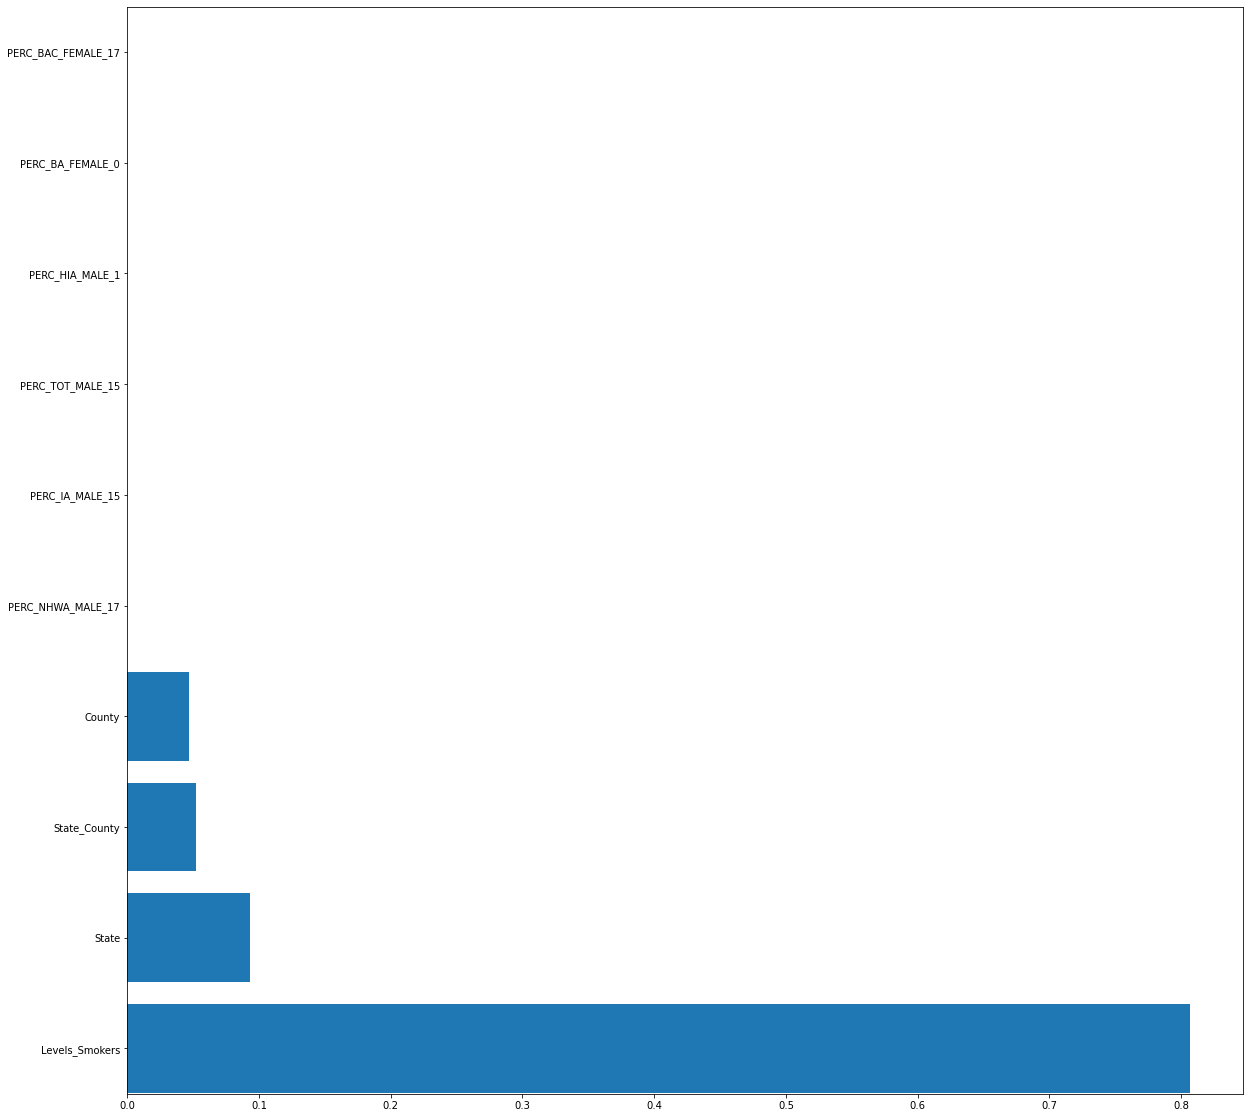

In [30]:
# cols = [f[0] for f in features]
cols = [f[0] for f in top_10_features]
# width = [f[1] for f in features]
width = [f[1] for f in top_10_features]
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)
plt.show()

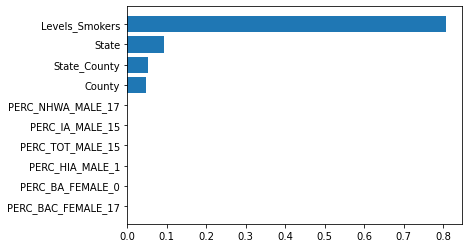

In [31]:
# cols = [f[0] for f in features]
cols = [f[0] for f in top_10_features]
# width = [f[1] for f in features]
width = [f[1] for f in top_10_features]

plt.figure()
plt.barh(cols, width)
plt.gca().invert_yaxis()

In [32]:
# Step 5: Predicting the Results

y_pred = regressor.predict(X_test)

In [33]:
# Step 6: Evaluating the Algorithm
from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.1902826494096233


In [34]:
# Step 6: Comparing the Real Values with Predicted Values
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
2535,6.4,6.18
1284,9.9,8.56
617,7.3,7.34
2863,9.7,7.28
2731,7.0,7.93
...,...,...
1000,7.0,5.86
3039,6.5,7.05
1873,8.6,8.15
4,6.6,7.94


In [35]:
X_test

,State_County,State,County,Levels_Smokers,Surface_Mines,Underground_Mines,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,...,PERC_HWAC_MALE_18,PERC_HWAC_FEMALE_18,PERC_HBAC_MALE_18,PERC_HBAC_FEMALE_18,PERC_HIAC_MALE_18,PERC_HIAC_FEMALE_18,PERC_HAAC_MALE_18,PERC_HAAC_FEMALE_18,PERC_HNAC_MALE_18,PERC_HNAC_FEMALE_18
2535,1175,40,705,14.9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1284,960,24,588,20.9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
617,2428,13,1398,17.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2863,2337,45,1340,19.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2731,3038,42,1775,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,2896,16,1714,14.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3039,2601,46,1509,15.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1873,892,34,556,20.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1484,1,869,19.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Step 6: Comparing the Real Values with Predicted Values
df = pd.DataFrame({'State_County': X_test['State_County'], 'State': X_test['State'], 'County': X_test['County'], 'Real Values':y_test, 'Predicted Values':y_pred})
df

,State_County,State,County,Real Values,Predicted Values
2535,1175,40,705,6.4,6.18
1284,960,24,588,9.9,8.56
617,2428,13,1398,7.3,7.34
2863,2337,45,1340,9.7,7.28
2731,3038,42,1775,7.0,7.93
...,...,...,...,...,...
1000,2896,16,1714,7.0,5.86
3039,2601,46,1509,6.5,7.05
1873,892,34,556,8.6,8.15
4,1484,1,869,6.6,7.94


In [38]:
# # For loop to encode text columns to numerical values
# for textColumn in dataset_cat:
#     df[textColumn] = le.inverse_transform(df[textColumn])

In [ ]:
# X_test_labels = le.inverse_transform(df[textColumn])

In [40]:
df["County"] =  le.inverse_transform(df["County"])

In [41]:
df.sort_index()

,State_County,State,County,Real Values,Predicted Values
1,1938,15,Monona,8.3,7.53
4,1484,1,Ketchikan Gateway,6.6,7.94
9,2211,3,Perry,11.1,11.85
10,388,3,Carroll,9.8,8.74
14,1742,3,Madison,11.3,12.04
...,...,...,...,...,...
3113,1473,48,Kenosha,5.6,7.25
3114,1772,48,Marathon,6.2,6.70
3115,1413,47,Jefferson,8.1,8.22
3118,290,48,Brown,5.5,5.92


In [42]:
# Export results from y test to csv
file_path = "../Data_Processing/Resources/RandomForest_Pred_vs_Actual_y_Results.csv"
df.to_csv(file_path)

In [ ]:
dataset.head(331)

In [ ]:
# Export values from x test to csv
file_path = "../Data_Processing/Resources/RandomForest_Pred_vs_Actual_X_Results.csv"
X_test.to_csv(file_path)

In [ ]:
plt.title('Scatter Plots')
plt.xlabel('Levels_Smokers')
plt.ylabel('Levels_COPD')
plt.scatter(X, y)
plt.show()

In [ ]:
X.info()

In [ ]:
np.arange(X)

In [ ]:
# # Visualising the Random Forest Regression Results  
# 
X_grid = np.arange(int (float(min(X))), int(float(max(X))), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Levels_Smokers')
plt.ylabel('Levels_COPD')
plt.show()

In [ ]:
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [ ]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [ ]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [ ]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [ ]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Check the structure of the Sequential model
nn_model.summary()

In [ ]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")